In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import time

### Generating injection data

In [39]:
u_inj = 0.9
mu_inj = 40.0
sig_inj = 5.0
N_inj = 1000

m_samples = np.concatenate([np.random.uniform(0, 100, np.round(u_inj * N_inj).astype(int)), \
                            np.random.normal(mu_inj, sig_inj, np.round((1 - u_inj) * N_inj).astype(int))])
np.random.shuffle(m_samples)

### Inference

In [40]:
len(m_samples)

1000

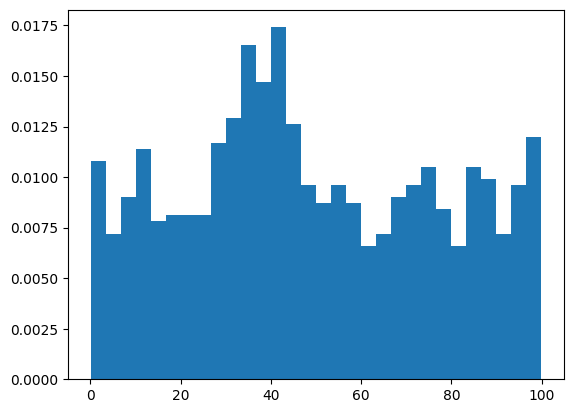

In [41]:
plt.hist(m_samples, bins=30, density=True)
plt.show()

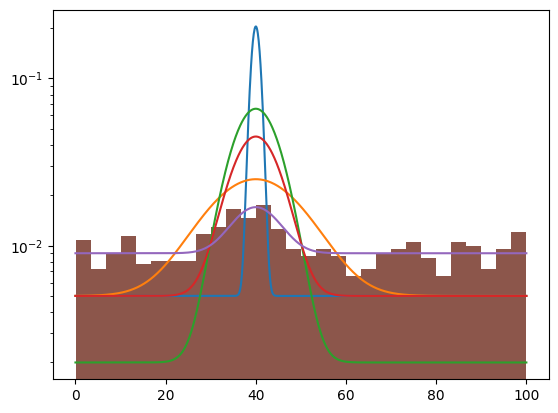

In [42]:
def Model(m, mu, sig, u, mmin, mmax):
    P_U = (m <= mmax) * (m >= mmin) / (mmax - mmin)
    P_G = np.exp(-(m - mu)**2.0 / sig**2.0 * 0.5) / (2 * np.pi)**0.5 / sig
    return u * P_U + (1 - u) * P_G

def Likelihood(m, mu, sig, u, mmin, mmax): return Model(m, mu, sig, u, mmin, mmax)

m_arr = np.linspace(0, 100, 1000)
plt.plot(m_arr, Model(m_arr, 40, 1, 0.5, 0, 100))
plt.plot(m_arr, Model(m_arr, 40, 10, 0.5, 0, 100))
plt.plot(m_arr, Model(m_arr, 40, 5, 0.2, 0, 100))
plt.plot(m_arr, Model(m_arr, 40, 5, 0.5, 0, 100))
plt.plot(m_arr, Model(m_arr, 40, 5, 0.9, 0, 100))
plt.hist(m_samples, bins=30, density=True)

plt.yscale('log')
plt.show()

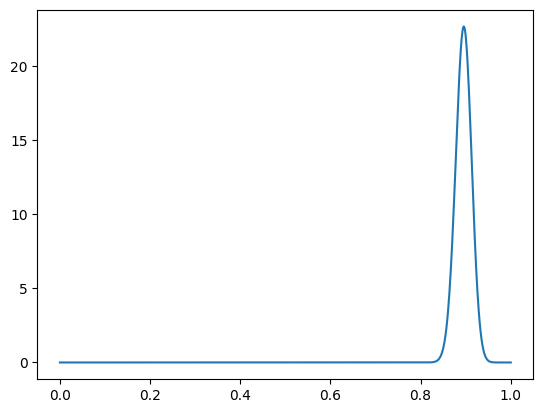

In [43]:
u_arr = np.linspace(0,1,1000)
lnL = u_arr * 0
for i in range(len(u_arr)):
    lnL[i] = np.sum(np.log(Model(m_samples, 40, 5, u_arr[i], 0, 100)))

lnL = lnL - np.max(lnL)
Post = np.exp(lnL)
Post = Post / np.trapz(Post, u_arr) # normalization "by hand"

plt.plot(u_arr, Post)
plt.show()

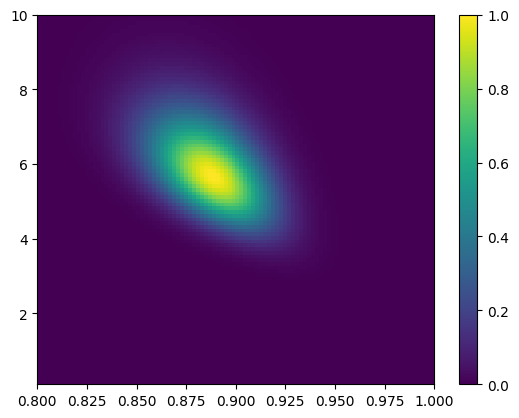

In [44]:
u_arr = np.linspace(0.8,1,100)
sig_arr = np.linspace(0.1, 10, 100)
u_grid, sig_grid = np.meshgrid(u_arr, sig_arr)
lnL = u_grid * 0
for i in range(u_grid.shape[0]):
    for j in range(u_grid.shape[1]):
        lnL[i,j] = np.sum(np.log(Model(m_samples, 40, sig_grid[i,j], u_grid[i,j], 0, 100)))

lnL = lnL - lnL.max()
Post = np.exp(lnL)

plt.imshow(Post, origin='lower', extent=[u_arr.min(), u_arr.max(), 0.1,10], aspect='auto')
plt.colorbar()
# plt.scatter([u_inj], [sig_inj], marker='x', color='r')
plt.show()

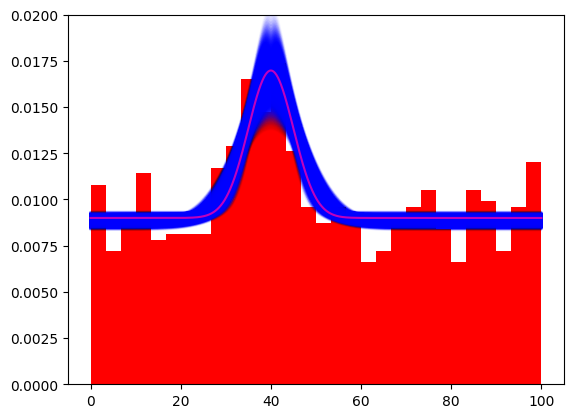

In [45]:
cmap = plt.get_cmap('viridis')

for i in range(u_grid.shape[0]):
    for j in range(u_grid.shape[1]):
        if Post[i,j] > 0.05:
            plt.plot(m_arr, Model(m_arr, 40, sig_grid[i,j], u_grid[i,j], 0, 100), \
                 color='b', alpha=Post[i,j]**2.0, zorder = int(100 * Post[i,j]))

plt.plot(m_arr, Model(m_arr, 40, 5, 0.9, 0, 100), color='m', zorder=100)

plt.hist(m_samples, bins=30, density=True, color='r', zorder=0)
plt.ylim(None, 0.02)
plt.show()

In [55]:
z_arr = np.linspace(0,8, 17)
z_max = 7.5
z_arr[:np.argmin(np.abs(z_arr - z_max))+1]

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5])